In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable

import numpy as np

from sklearn.manifold import TSNE
import sklearn
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
from PIL import Image
%matplotlib inline
import os
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

RS = 20150101

In [3]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

In [4]:
os.getcwd()
os.chdir('./tsne_sc')

In [5]:
domain_y1_torch = torch.load("plot_tsne2-domain_y1_torch.pt")
domain_y1_torch = domain_y1_torch.data.cpu().numpy()

domain_y2_torch = torch.load("plot_tsne2-domain_y2_torch.pt")
domain_y2_torch = domain_y2_torch.data.cpu().numpy()

domain_x1_torch = torch.load("plot_tsne2-domain_x1_torch.pt" )
domain_x2_torch = torch.load("plot_tsne2-domain_x2_torch.pt")
domain_x1_torch = domain_x1_torch.data.cpu().numpy()
domain_x2_torch = domain_x2_torch.data.cpu().numpy()


label_y_s_torch = torch.load("plot_tsne2-label_y_s_torch.pt")
label_y_t_torch = torch.load("plot_tsne2-label_y_t_torch.pt")
label_y_all = torch.cat((label_y_s_torch,label_y_t_torch),dim=0).cpu().numpy()

In [6]:
print(domain_y1_torch.shape)
print(domain_y2_torch.shape)
print(domain_x1_torch.shape)
print(domain_x2_torch.shape)
print(label_y_s_torch.shape)
print(label_y_t_torch.shape)
print(label_y_all.shape)

plot_domains = ['a.png','b.png','c.png']

num_domains = 4

(2496,)
(2048,)
(2496, 2048)
(2048, 2048)
torch.Size([2048])
torch.Size([448])
(2496,)


In [11]:
label_y_all.min()

0

In [7]:
X1 = TSNE(random_state=RS).fit_transform(domain_x1_torch)
X2 = TSNE(random_state=RS).fit_transform(domain_x2_torch)

In [50]:
def scatter(x, colors, label_y_all, labelsOfInterest, figSize, plotName):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 5))

    
    # We create a scatter plot.
    f = plt.figure(figsize=figSize)
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:2048,0], x[:2048,1], lw=0, s=40,
                    c=palette[colors[:2048].astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    plt.title(plotName)
    #ax.legend([plotName])
    ax.axis('off')
    ax.axis('tight')
    
    # We add the labels for each cluster.
    txts = []
    for i in range(1):
        # Position of each label.
        indexes = (label_y_all[:2048] == i)
        #indexes1 = (domain_y1_torch == 1)
        #indexes = indexes & indexes1
        x_new = x[:2048][indexes, :]
        
        print(x_new.shape)
        xtext, ytext = np.mean(x_new, axis=0)
        print(xtext, ytext)
        txt = ax.text(xtext, ytext, str(i), fontsize=25)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        

(234, 2)
-2.9589014 -0.89828223


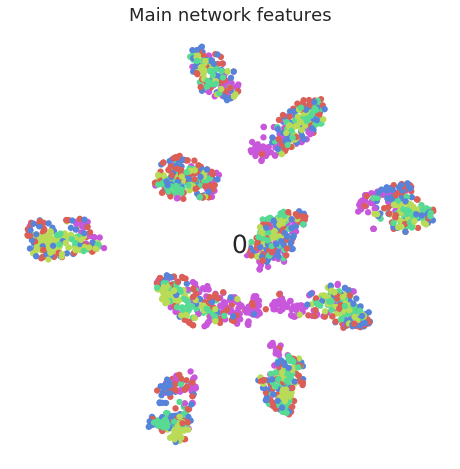

In [51]:
scatter(X1,domain_y1_torch,label_y_all,[i for i in range(10)], (8,8), 'Main network features')
#plt.savefig(plot_domains[0], dpi=120)
plt.show()

In [10]:
scatter(X2,domain_y2_torch,[i for i in range(num_domains+1)], (8,8), 'DP network layer')
#plt.savefig(plot_domains[1], dpi=120)
plt.show()

TypeError: scatter() missing 1 required positional argument: 'plotName'

In [ ]:
final = get_concat_h(Image.open(plot_domains[0]),Image.open(plot_domains[1]))
final.save(plot_domains[2])
print('latent domain plots saved in : ', plot_domains[2])